# Exploring new features

In the previous notebook, we explored the target variable and the features that were already available. In this notebook, we will focus on the new features correlated with text data.

In [3]:
# import basic libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path # for path related operations
pd.options.display.max_colwidth = 100 # to display full text in columns

In [4]:
# load data
data_path = Path("../../Data") 
train_df = pd.read_csv(data_path / "train.csv") 

In [7]:
# Name of the columns
text_col = "full_text"
numberic_cols = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]
num_of_words = "num_of_words"

In [8]:
# Add a column to store the number of words in the text
train_df[num_of_words] = train_df[text_col].apply(lambda x: len(x.split()))

<AxesSubplot: title={'center': 'Distribution of text length'}, ylabel='Frequency'>

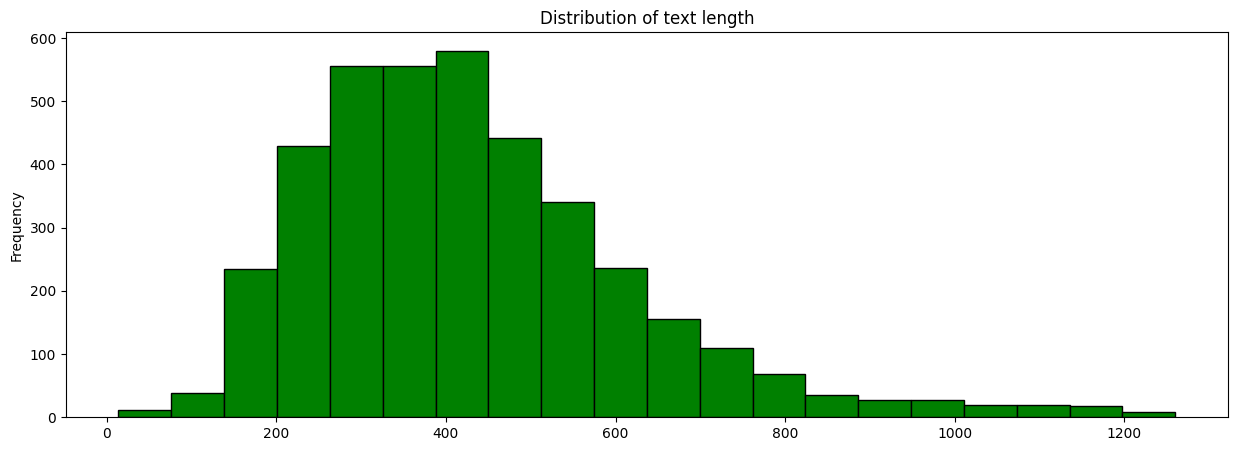

In [13]:
# Plot the distribution of text length
train_df[num_of_words].plot(kind='hist', 
                            figsize=(15, 5),
                            bins=20,
                            title="Distribution of text length",
                            color='green',
                            edgecolor='black',
                            xlabel="Number of words",
                            ylabel="Frequency")


<AxesSubplot: title={'center': 'num_of_words'}, xlabel='[cohesion, syntax, vocabulary, phraseology, grammar, conventions]'>

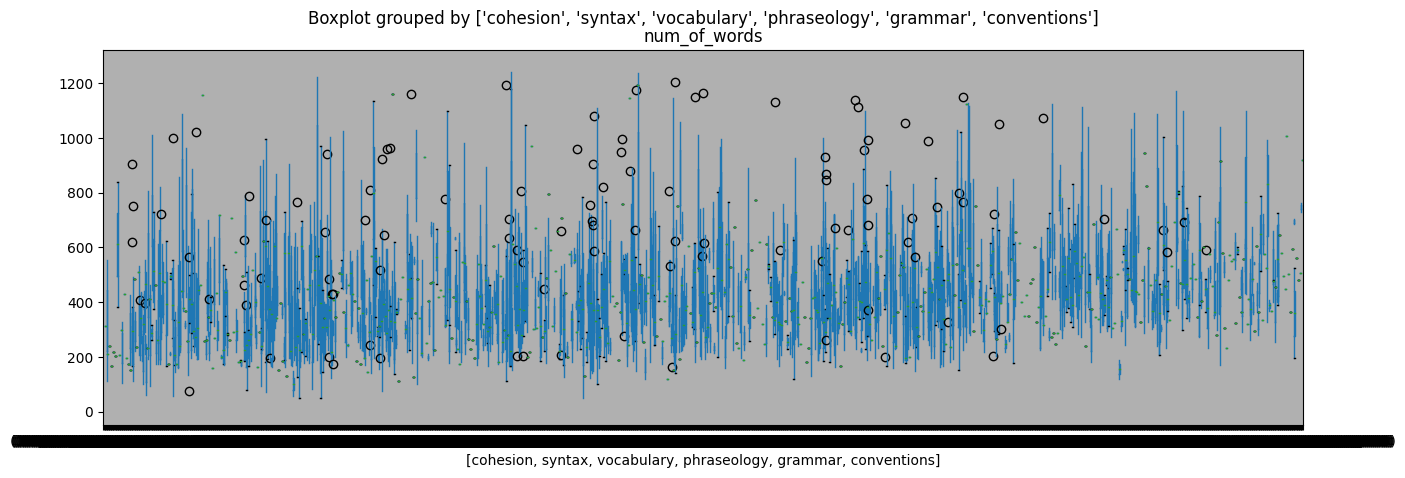

In [24]:
# Plotbox of the length of each text for each numeric feature
train_df.boxplot(column=num_of_words, by=numberic_cols, figsize=(15, 5))